In [1]:
#to moun the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#TO import data from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
#to authenticate google drive account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#Bring file in /content/ from google drive
#https://drive.google.com/open?id=1lZYdxyO5pFFHvjxdFtGA8m9WS9haUHG5
#https://drive.google.com/open?id=1a3p1KL3egwoR76t90PaMdtszh_USRoPq
downloaded = drive.CreateFile({'id':"1a3p1KL3egwoR76t90PaMdtszh_USRoPq"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Final-Updated-stanford-car-dataset-by-classes-folder.zip')        # replace the file name with your file

In [5]:
#downloading DataSet From Kaggle using API
#import os
#os.environ['KAGGLE_USERNAME'] = "muhammadsafwan" # username from the json file
#os.environ['KAGGLE_KEY'] = "54baf031d17e8d10d150668cdbeca660" # key from the json file
#!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder # api copied from kaggle


In [6]:
#Unzipping the files
!unzip -q "/content/Final-Updated-stanford-car-dataset-by-classes-folder.zip"


In [7]:
#Importing libraries
import matplotlib.pyplot as plt   #for ploting
import numpy as np                #for arrays
import torch                      #for definig neural network
from torch import nn              #for definign NN
from torch import optim           #for defining optimizer
from torchsummary import summary  #for model summary
import torch.nn.functional as F   #for 
from torchvision import datasets, transforms, models  #for downloading models
import torchvision.models as models   #for downlaoding models
from PIL import Image         #for manipulating image 
from matplotlib.ticker import FormatStrFormatter #for Ploting
import os                           #for Directories
                            


In [8]:
# Tansform with data augmentation and normalization for training
# Just normalization for validation
# Training transform includes random rotation and flip to build a more robust model

#definig augmentation for train data RESIZING ROTATING FLIP CONVERTING TO TENSOR AND NORMALIZATION

train_transforms = transforms.Compose([transforms.Resize((244,244)),
                                       transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#transform for valid data RESIZE CONVERTING TO TENSOR NORMALIZATIOM
valid_transforms = transforms.Compose([transforms.Resize((244,244)),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


#transform for test data RESIZE CONVERTING TO TENSOR NORMALIZATIOM
test_transforms = transforms.Compose([transforms.Resize((244,244)),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



In [9]:
train_dir = '/content/Final-Updated-stanford-car-dataset-by-classes-folder/car_data/car_data/train'
test_dir = '/content/Final-Updated-stanford-car-dataset-by-classes-folder/car_data/car_data/test'
#label_dir = '/content/Updated-stanford-car-dataset-by-classes-folder/names.csv'


#Loading in the dataset
#train_dir = r'D:\Python Project\PytorchPractice\CarClassifier\classifier\stanford-car-dataset-by-classes-folder\car_data\car_data\train'
#test_dir = r'D:\Python Project\PytorchPractice\CarClassifier\classifier\stanford-car-dataset-by-classes-folder\car_data\car_data\test'
#label_dir = r'D:\Python Project\PytorchPractice\CarClassifier\classifier\stanford-car-dataset-by-classes-folder\names.csv'
#train_dir = r'F:\Sample Data\data 10 cars\data\train'
#test_dir = r'F:\Sample Data\data 10 cars\data\test'
#label_dir = r'D:\Python Project\PytorchPractice\CarClassifier\classifier\stanford-car-dataset-by-classes-folder\names.csv'

batch_size=64
#no of images feed to the network at one time

#Loading Dataset
dataset = datasets.ImageFolder(train_dir,transform=train_transforms)
testdataset = datasets.ImageFolder(test_dir,transform=test_transforms)
# splitting our dataset into Train and Validation Dataset
valid_size  = int(0.1 * len(dataset))
train_size = len(dataset) - valid_size
dataset_sizes = {'train': train_size, 'valid': valid_size}

train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

# Loading datasets into dataloader
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=batch_size, shuffle=True)

print("Number of Samples in Train: ",len(train_dataset))
print("Number of Samples in Valid: ",len(valid_dataset))
print("Number of Samples in Test: ",len(testdataset))
print("Total: ",len(testdataset)+len(valid_dataset)+len(train_dataset))

print("Number of Classes: ",len(testdataset.classes))

print(dataset.classes)



Number of Samples in Train:  8409
Number of Samples in Valid:  934
Number of Samples in Test:  3194
Total:  12537
Number of Classes:  150
['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Coupe 2012', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S5 Convertible 2012', 'Audi S6 Sedan 2011', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Wagon 2012', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'Bentley Arnage Sedan 2009', 'Bentley Continental GT Coupe 2007', 'Bentley Continental Supersports Conv. Convertible 2012', 'Bentley Mulsanne Sedan 2011', 'Bugatti Veyron 16.4 Convertible 2009', 'Bugatti Veyron 16.4 Coupe 2009', 'Buick En

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [11]:
#loading pre define ResNet model 
model = models.resnet34(pretrained=True)
#****************CHANGING THE OUTPUT LAYER A/C to our requirement*********************
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 150)
model = model.to(device)


summary(model, input_size=(3, 244, 244))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]          36,864
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
       BasicBlock-11           [-1, 64, 61, 61]               0
           Conv2d-12           [-1, 64, 61, 61]          36,864
      BatchNorm2d-13           [-1, 64, 61, 61]             128
             ReLU-14           [-1, 64

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

In [13]:
# Implement a function for the validation pass
def validation(model, validloader, criterion):
    valid_loss = 0
    accuracy = 0
    
    # change model to work with cuda
    model.to(device)

    # Iterate over data from validloader
    for ii, (images, labels) in enumerate(validloader):
    
        # Change images and labels to work with cuda
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass image though model for prediction
        output = model.forward(images)
        # Calculate loss
        valid_loss += criterion(output, labels).item()
        # Calculate probability
        ps = torch.exp(output)
        
        # Calculate accuracy
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return valid_loss, accuracy

In [14]:
epochs = 12
steps = 0
print_every = 40

#for ploting Graphs
valid_loss_A = [0,0,0,0,0,0,0,0,0,0,0,0]
valid_accuracy_A= [0,0,0,0,0,0,0,0,0,0,0,0]
train_loss_A= [0,0,0,0,0,0,0,0,0,0,0,0]

#change to gpu mode
model.to(device)
model.train()

for e in range(epochs):
    print("Starting Epoch",e+1)
    running_loss = 0
    
    # Iterating over data to carry out training step
    for ii, (inputs, labels) in enumerate(trainloader):
        steps += 1
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zeroing parameter gradients
        optimizer.zero_grad()
        
        # Forward and backward passes
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Carrying out validation step
        if steps % print_every == 0:
            # setting model to evaluation mode during validation
            model.eval()
            # Gradients are turned off as no longer in training
            with torch.no_grad():
                valid_loss, accuracy = validation(model, validloader, criterion)
            
            ValidLoss = round(valid_loss/len(validloader),3)
            ValidAccuracy = round(float(accuracy/len(validloader)),3)
            TrainingLoss = round(running_loss/print_every,3)

            print("No. epochs:",(e+1),"\tTraining Loss:",TrainingLoss,"\tValid Loss",ValidLoss,"\tValid Accuracy",ValidAccuracy)
            
            valid_loss_A[e] = ValidLoss
            valid_accuracy_A[e] = ValidAccuracy
            train_loss_A[e] =  TrainingLoss


            if (e+1) % 10 == 0 :
              #Saving: feature weights, new model.fc, index-to-class mapping, optimiser state, and No. of epochs
              checkpoint = {
              'state_dict': model.state_dict(),
              'model': model.fc,
              'class_to_idx': dataset.class_to_idx,
              'opt_state': optimizer.state_dict,
              'num_epochs': epochs}
              #name = str(e)
              path = '/content/drive/My Drive/Colab Notebooks/model/modelFinal.pth'
              torch.save(checkpoint, path)

            # Turning training back on
            model.train()
            lrscheduler.step(accuracy * 100)


Starting Epoch 1
No. epochs: 1 	Training Loss: 4.91 	Valid Loss 4.413 	Valid Accuracy 0.066
No. epochs: 1 	Training Loss: 8.769 	Valid Loss 3.373 	Valid Accuracy 0.23
No. epochs: 1 	Training Loss: 11.676 	Valid Loss 2.85 	Valid Accuracy 0.288
Starting Epoch 2
No. epochs: 2 	Training Loss: 1.347 	Valid Loss 2.203 	Valid Accuracy 0.43
No. epochs: 2 	Training Loss: 2.949 	Valid Loss 1.771 	Valid Accuracy 0.547
No. epochs: 2 	Training Loss: 4.283 	Valid Loss 1.701 	Valid Accuracy 0.54
Starting Epoch 3
No. epochs: 3 	Training Loss: 0.354 	Valid Loss 1.649 	Valid Accuracy 0.55
No. epochs: 3 	Training Loss: 1.192 	Valid Loss 1.548 	Valid Accuracy 0.588
No. epochs: 3 	Training Loss: 1.948 	Valid Loss 1.158 	Valid Accuracy 0.665
Starting Epoch 4
No. epochs: 4 	Training Loss: 0.041 	Valid Loss 0.7 	Valid Accuracy 0.832
No. epochs: 4 	Training Loss: 0.438 	Valid Loss 0.662 	Valid Accuracy 0.832
No. epochs: 4 	Training Loss: 0.816 	Valid Loss 0.651 	Valid Accuracy 0.844
No. epochs: 4 	Training Los

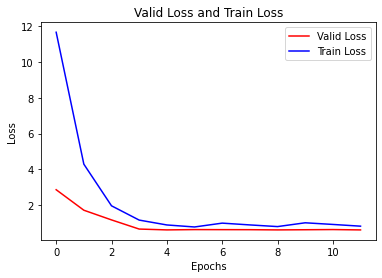

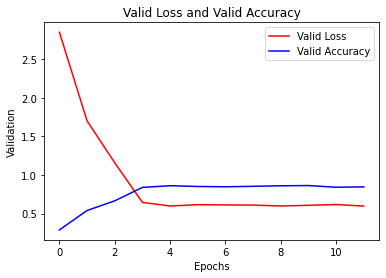

In [15]:

#valid_loss_A= [0.761, 0.418, 0.413, 0.394, 0.389, 0.393, 0.382, 0.374, 0.382, 0.391, 0.388, 0.407]
#valid_accuracy_A= [0.775, 0.888, 0.876, 0.887, 0.893, 0.893, 0.887, 0.898, 0.898, 0.883, 0.889, 0.891]
#train_loss_A = [0.913, 0.477, 0.238, 0.27, 0.237, 0.221, 0.266, 0.26, 0.224, 0.278, 0.264, 0.244]



epochs = range(len(valid_accuracy_A))


plt.plot(epochs, valid_loss_A, 'r', label='Valid Loss')
plt.plot(epochs, train_loss_A, 'b', label='Train Loss')
plt.title('Valid Loss and Train Loss')
plt.ylabel('Loss') 
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(epochs, valid_loss_A, 'r', label='Valid Loss')
plt.plot(epochs, valid_accuracy_A, 'b', label='Valid Accuracy')
plt.title('Valid Loss and Valid Accuracy')
plt.ylabel('Validation') 
plt.xlabel('Epochs')
plt.legend()
plt.show()
